# Using PIL for autofocussing
i luv 🅱️raxis

In [12]:
import numpy as np
from PIL import Image, ImageFilter

Some good sources to check out:
- https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html
- [cv_ch10] https://cse.usf.edu/~r1k/MachineVisionBook/MachineVision.files/MachineVision_Chapter10.pdf

JPEG (190, 168) RGB


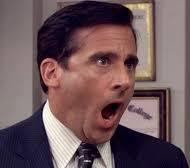

In [13]:
img_path = r'C:\Users\Youssef\Pictures\dog.jpg'
img = Image.open(img_path)
print(img.format, img.size, img.mode)
display(img) # built-in notebook command i think

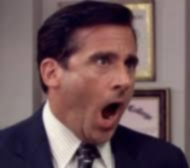

In [14]:
blurred_img = img.filter(ImageFilter.GaussianBlur(radius=1))
display(blurred_img)

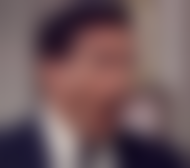

In [15]:
blurreed_img = img.filter(ImageFilter.GaussianBlur(radius=10))
display(blurreed_img)

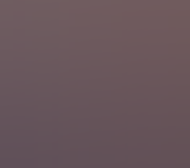

In [16]:
blureeed_img = img.filter(ImageFilter.GaussianBlur(radius=100))
display(blureeed_img)

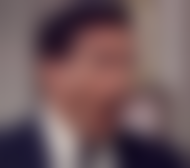

In [17]:
unblured_img = img.filter(ImageFilter.GaussianBlur(radius=-10))
display(unblured_img)

In [18]:
imgdata = list(img.getdata()) # Returns a list of pixels (represented as RGB tupples)
print(len(imgdata))

31920


$$ F = \frac{1}{WH\mu} \sum (I(x, y) - \mu)^2$$
We compute $I$ as the normalised sum of the channel values [cv_ch10] $$ I = \frac{1}{3} (R+G+B)$$
$\mu$ is the average value of $I$
Here we interpret $W, H$ as the dimensions of the picture

In [19]:
def F(image):
    imgdata = list(image.getdata())
    I    = lambda RGB : sum(RGB) / 3
    mu   = sum(map(I, imgdata))/np.prod(image.size)
    W, H = image.size
    return 1 / (W * H * mu) * sum(((i - mu)**2 for i in map(I, imgdata))) 

In [20]:
print(
    F(unblured_img),
    F(img),
    F(blurred_img),
    F(blurreed_img),
    F(blureeed_img),
    sep="\n"
)

11.312752501148598
30.613822098606878
28.387673547397675
11.312752501148598
0.12707561929416641


# Now I need a way to run tests
- Get a dataset
- Compute focus for all images
- Randomize initial blur
- "Let the algorithm run"
- Compute mean squared error
- Tweak Algorithm

Because this problem is not solved, is it good enough to note that a change in position inducing a change in focus is enough to define a direction for the camera to move in.

This is just running the algorithm over and over, not useful since the image cant "de-blur" (https://www.robots.ox.ac.uk/~az/lectures/ia/lect3.pdf is goofy)
Need a real camera test

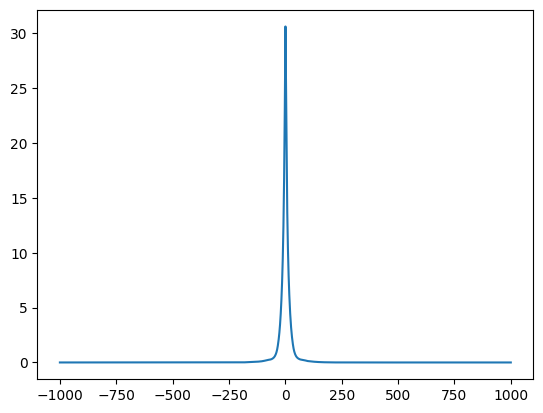

In [21]:
import matplotlib.pyplot as plt
num = 1001
plt.plot(range(-num, num), [F(img.filter(ImageFilter.GaussianBlur(radius=i))) for i in range(-num, num)])

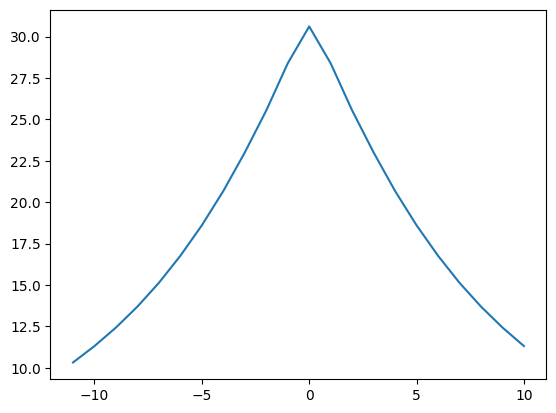

In [22]:
num = 11
plt.plot(range(-num, num), [F(img.filter(ImageFilter.GaussianBlur(radius=i))) for i in range(-num, num)])

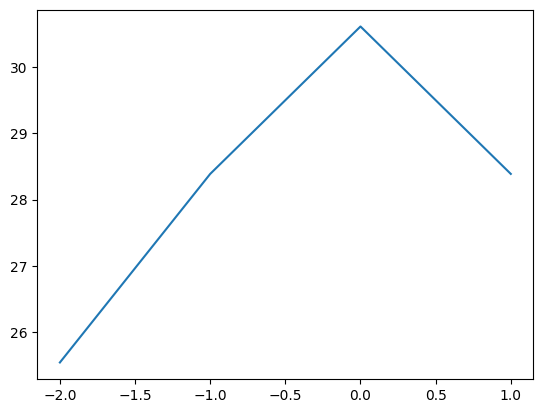

In [23]:
num = 1+1
plt.plot(range(-num, num), [F(img.filter(ImageFilter.GaussianBlur(radius=i))) for i in range(-num, num)])

The above demonstrates that sampling can have an adaptive step size.